In [1]:
#https://raw.githubusercontent.com/notadamking/RLTrader/master/data/input/coinbase-1h-btc-usd.csv

In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import opendatasets as od

%matplotlib inline

In [7]:
#https://raw.githubusercontent.com/notadamking/RLTrader/master/data/input/coinbase-1h-btc-usd.csv
df = pd.read_csv("https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3201.0,1.632572e+03,2.962080e+03,0.04951,12.50,3.616700e+02,1.033300e+03,1.934660e+04
High,3201.0,1.685521e+03,3.072654e+03,0.04951,12.69,3.746700e+02,1.062790e+03,1.987062e+04
Low,3201.0,1.572301e+03,2.824316e+03,0.01000,12.25,3.504900e+02,9.924500e+02,1.875091e+04
Close,3201.0,1.634224e+03,2.962630e+03,0.04951,12.51,3.617100e+02,1.033720e+03,1.934549e+04
Adj Close,3201.0,1.634224e+03,2.962630e+03,0.04951,12.51,3.617100e+02,1.033720e+03,1.934549e+04
Volume,3201.0,1.524097e+08,4.070572e+08,0.00000,536267.00,1.012788e+07,6.814613e+07,6.245732e+09


In [9]:
date_time = pd.to_datetime(df.pop('Date'))
date_time

0      2010-07-16
1      2010-07-17
2      2010-07-18
3      2010-07-19
4      2010-07-20
          ...    
3196   2019-04-16
3197   2019-04-17
3198   2019-04-18
3199   2019-04-19
3200   2019-04-20
Name: Date, Length: 3201, dtype: datetime64[ns]

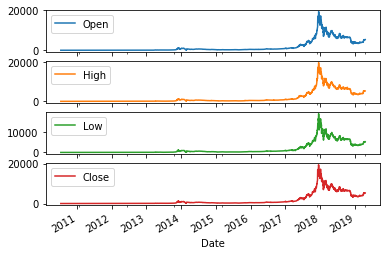

In [10]:
plot_cols = ['Open', 'High', 'Low', 'Close']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

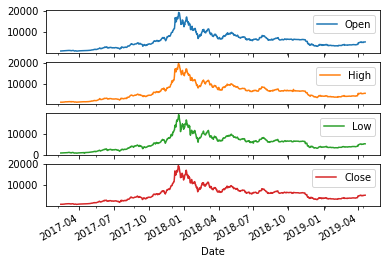

In [17]:
plot_features = df[plot_cols][2401:3201]
plot_features.index = date_time[2401:3201]
_ = plot_features.plot(subplots=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3201 non-null   float64
 1   High       3201 non-null   float64
 2   Low        3201 non-null   float64
 3   Close      3201 non-null   float64
 4   Adj Close  3201 non-null   float64
 5   Volume     3201 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.2 KB


In [39]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s[0], timestamp_s[1], (timestamp_s[1] - timestamp_s[0]), 24*60*60

(1279238400.0, 1279324800.0, 86400.0, 86400)

In [63]:
(timestamp_s - timestamp_s[0]), (timestamp_s - timestamp_s[0]) / (24*60*60)\
, ((timestamp_s - timestamp_s[0]) / (24*60*60)) * np.pi, np.sin(((timestamp_s - timestamp_s[0]) / (24*60*60)) * np.pi)

(0               0.0
 1           86400.0
 2          172800.0
 3          259200.0
 4          345600.0
            ...     
 3196    276134400.0
 3197    276220800.0
 3198    276307200.0
 3199    276393600.0
 3200    276480000.0
 Name: Date, Length: 3201, dtype: float64,
 0          0.0
 1          1.0
 2          2.0
 3          3.0
 4          4.0
          ...  
 3196    3196.0
 3197    3197.0
 3198    3198.0
 3199    3199.0
 3200    3200.0
 Name: Date, Length: 3201, dtype: float64,
 0           0.000000
 1           3.141593
 2           6.283185
 3           9.424778
 4          12.566371
             ...     
 3196    10040.530121
 3197    10043.671714
 3198    10046.813306
 3199    10049.954899
 3200    10053.096491
 Name: Date, Length: 3201, dtype: float64,
 0       0.000000e+00
 1       1.224647e-16
 2      -2.449294e-16
 3       3.673940e-16
 4      -4.898587e-16
             ...     
 3196   -1.258259e-12
 3197    9.279793e-13
 3198   -5.976994e-13
 3199    2.674195e-13
 3

In [71]:
np.pi

3.141592653589793

In [93]:
timestamp_d = (timestamp_s - timestamp_s[0]) / (24 * 60 * 60)
timestamp_d, timestamp_d[0], timestamp_d[7] / 7 * np.pi

(0          0.0
 1          1.0
 2          2.0
 3          3.0
 4          4.0
          ...  
 3196    3196.0
 3197    3197.0
 3198    3198.0
 3199    3199.0
 3200    3200.0
 Name: Date, Length: 3201, dtype: float64,
 0.0,
 3.141592653589793)

In [97]:
day = 24*60*60
week = day * 7
day_30 = day * 30
year = (365.2425)*day

df['Day week sin'] = np.sin(timestamp_d / 7 * np.pi)
df['Day week cos'] = np.cos(timestamp_d / 7 * np.pi)
df['Day 30 sin'] = np.sin(timestamp_d / 30 * np.pi)
df['Day 30 cos'] = np.cos(timestamp_d / 30 * np.pi)
df['Year sin'] = np.sin(timestamp_d / 365 * np.pi)
df['Year cos'] = np.cos(timestamp_d / 365 * np.pi)

Text(0.5, 1.0, 'Time of day signal')

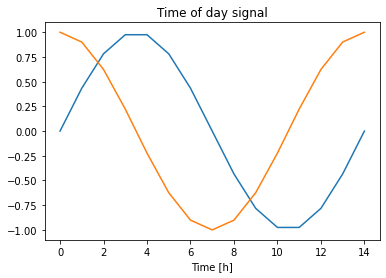

In [99]:
plt.plot(np.array(df['Day week sin'])[:15])
plt.plot(np.array(df['Day week cos'])[:15])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

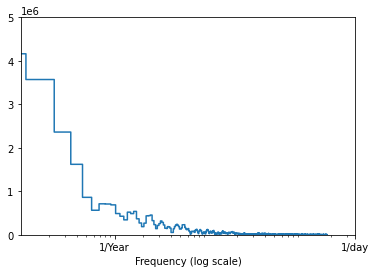

In [104]:
fft = tf.signal.rfft(df['Open'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df['Open'])
days_per_year = 365
years_per_dataset = n_samples_d/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 5000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [107]:
f_per_dataset, years_per_dataset, n_samples_d

(array([   0,    1,    2, ..., 1598, 1599, 1600]), 8.76986301369863, 3201)

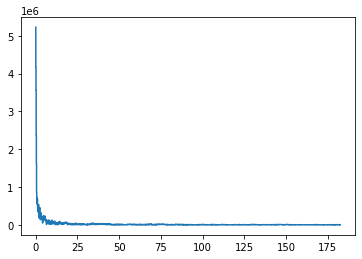

In [113]:
plt.step(f_per_year, np.abs(fft))

In [115]:
len(f_per_year), f_per_year

(1601,
 array([0.00000000e+00, 1.14026867e-01, 2.28053733e-01, ...,
        1.82214933e+02, 1.82328960e+02, 1.82442987e+02]))

https://towardsdatascience.com/cryptocurrency-price-prediction-using-lstms-tensorflow-for-hackers-part-iii-264fcdbccd3f

In [116]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

In [117]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3201 non-null   datetime64[ns]
 1   Open       3201 non-null   float64       
 2   High       3201 non-null   float64       
 3   Low        3201 non-null   float64       
 4   Close      3201 non-null   float64       
 5   Adj Close  3201 non-null   float64       
 6   Volume     3201 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.1 KB
